# **"How does various factors of Airbnb listings affect the price?"**

# Project 1 

## Introduction


The main aim of this project is to understand how various factors, such as property type, room type, and the number of bathrooms/bedrooms, impact the price at which listings are offered on Airbnb. Airbnb is a home-sharing plaform that allows hosts to rent out their homes. The hosts get to set the prices for their listings, under certain regulations and guidance by the platform. There are many attributes of the listings (e.g., neighbourhood, amenities, reviews) that would possibly affect the pricing, but the type of property, being the most visible and distinguishable characteristic, certainly have a significant impact on the pricing. 


The dataset, sourced from Kaggle's Airbnb Boston listing dataset, serves as the foundation for this investigation, providing a rich canvas to analyze and derive insights from the evolving landscape of urban short-term rentals. Through data analysis and visualization, we seek to identify patterns and insights that could be valuable for hosts looking to price their listings competitively. Initial findings suggest that certain features significantly affect listing prices, offering a foundation for further investigation and analysis as the project progresses.

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
df = pd.read_csv('listings.csv')

In [4]:
df.head() 

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...",...,9.0,f,NaN,NaN,t,moderate,f,f,1,1.30
2,6976,https://www.airbnb.com/rooms/6976,20160906204935,2016-09-07,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",none,The LOCATION: Roslindale is a safe and diverse...,...,10.0,f,NaN,NaN,f,moderate,t,f,1,0.47
3,1436513,https://www.airbnb.com/rooms/1436513,20160906204935,2016-09-07,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,Most places you find in Boston are small howev...,Come experience the comforts of home away from...,none,Roslindale is a lovely little neighborhood loc...,...,10.0,f,NaN,NaN,f,moderate,f,f,1,1.00
4,7651065,https://www.airbnb.com/rooms/7651065,20160906204935,2016-09-07,Come Home to Boston,"My comfy, clean and relaxing home is one block...","Clean, attractive, private room, one block fro...","My comfy, clean and relaxing home is one block...",none,"I love the proximity to downtown, the neighbor...",...,10.0,f,NaN,NaN,f,flexible,f,f,1,2.25


X variable: property_type, room_type, bathrooms, bedrooms

Y variable: Price


The chosen X variables—property_type, room_type, bathrooms, and bedrooms—are critical in predicting the Y variable, price, because they fundamentally influence a property's appeal and functionality to potential guests. Property and room types provide insight into the listing's nature and privacy level, factors that significantly impact guest preferences and willingness to pay. The number of bathrooms and bedrooms directly correlates to the accommodation's capacity and comfort, affecting its market value. These variables align with the research question by investigating how tangible property features translate into economic value within the Airbnb market. Their importance lies in offering a quantifiable measure of what guests value, thus enabling hosts to strategically position their listings in the competitive landscape of short-term rental pricing.

## Data Cleaning

In [5]:
#Data cleaning

#Dropping NA values
df.isnull().sum()  # To check for missing values
columns_to_drop_na = ['price', 'property_type', 'room_type', 'bathrooms', 'bedrooms']
data_cleaned = df.dropna(subset=columns_to_drop_na)

#Dropping duplicates
df.drop_duplicates(inplace=False)


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...",...,9.0,f,NaN,NaN,t,moderate,f,f,1,1.30
2,6976,https://www.airbnb.com/rooms/6976,20160906204935,2016-09-07,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",none,The LOCATION: Roslindale is a safe and diverse...,...,10.0,f,NaN,NaN,f,moderate,t,f,1,0.47
3,1436513,https://www.airbnb.com/rooms/1436513,20160906204935,2016-09-07,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,Most places you find in Boston are small howev...,Come experience the comforts of home away from...,none,Roslindale is a lovely little neighborhood loc...,...,10.0,f,NaN,NaN,f,moderate,f,f,1,1.00
4,7651065,https://www.airbnb.com/rooms/7651065,20160906204935,2016-09-07,Come Home to Boston,"My comfy, clean and relaxing home is one block...","Clean, attractive, private room, one block fro...","My comfy, clean and relaxing home is one block...",none,"I love the proximity to downtown, the neighbor...",...,10.0,f,NaN,NaN,f,flexible,f,f,1,2.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3580,8373729,https://www.airbnb.com/rooms/8373729,20160906204935,2016-09-07,Big cozy room near T,5 min walking to Orange Line subway with 2 sto...,NaN,5 min walking to Orange Line subway with 2 sto...,none,NaN,...,9.0,f,NaN,NaN,t,strict,f,f,8,0.34
3581,14844274,https://www.airbnb.com/rooms/14844274,20160906204935,2016-09-07,BU Apartment DexterPark Bright room,"Most popular apartment in BU, best located in ...",Best location in BU,"Most popular apartment in BU, best located in ...",none,NaN,...,NaN,f,NaN,NaN,f,strict,f,f,2,NaN
3582,14585486,https://www.airbnb.com/rooms/14585486,20160906204935,2016-09-07,Gorgeous funky apartment,Funky little apartment close to public transpo...,Modern and relaxed space with many facilities ...,Funky little apartment close to public transpo...,none,"Cambridge is a short walk into Boston, and set...",...,NaN,f,NaN,NaN,f,flexible,f,f,1,NaN
3583,14603878,https://www.airbnb.com/rooms/14603878,20160906204935,2016-09-07,Great Location; Train and Restaurants,"My place is close to Taco Loco Mexican Grill, ...",NaN,"My place is close to Taco Loco Mexican Grill, ...",none,NaN,...,7.0,f,NaN,NaN,f,strict,f,f,1,2.00


In [6]:
#Checking if all necessary values were removed 

if df.isna().any().any():
    print("There are still NA values in the DataFrame.")
else:
    print("All NA values have been removed.")

if df.duplicated().any():
    print("There are still duplicate rows in the DataFrame.")
else:
    print("All duplicates have been removed.")


There are still NA values in the DataFrame.
All duplicates have been removed.


In [7]:
#data cleaning for y variable 
#some abnormalities observed while looking at the raw data
#need to convert it to a numeric format and drop rows with non-numeric values to get summary statistics 

# remove the '$' sign and ',' from the 'price' column
df['price'] = df['price'].replace('[\$,]', '', regex=True).astype(str)

# convert 'price' to numeric, setting errors='coerce' will replace non-numeric values with NaN
df['price'] = pd.to_numeric(df['price'], errors='coerce')

# drop rows where 'price' is NaN 
df = df.dropna(subset=['price'])

# check if everything is accurately executed
df.head()


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...",...,9.0,f,NaN,NaN,t,moderate,f,f,1,1.30
2,6976,https://www.airbnb.com/rooms/6976,20160906204935,2016-09-07,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",none,The LOCATION: Roslindale is a safe and diverse...,...,10.0,f,NaN,NaN,f,moderate,t,f,1,0.47
3,1436513,https://www.airbnb.com/rooms/1436513,20160906204935,2016-09-07,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,Most places you find in Boston are small howev...,Come experience the comforts of home away from...,none,Roslindale is a lovely little neighborhood loc...,...,10.0,f,NaN,NaN,f,moderate,f,f,1,1.00
4,7651065,https://www.airbnb.com/rooms/7651065,20160906204935,2016-09-07,Come Home to Boston,"My comfy, clean and relaxing home is one block...","Clean, attractive, private room, one block fro...","My comfy, clean and relaxing home is one block...",none,"I love the proximity to downtown, the neighbor...",...,10.0,f,NaN,NaN,f,flexible,f,f,1,2.25


In [8]:
# Dropping na

#drop na
unique_property_types = df['property_type'].unique()
property_types_clean = [x for x in unique_property_types if x == x]
property_types_clean

#drop na 
num_bedroom = df['bedrooms'].unique()
num_bedroom_clean = num_bedroom[~np.isnan(num_bedroom)]
num_bedroom_clean

#drop na
num_bathrooms = df['bathrooms'].unique()
num_bathrooms_clean = num_bathrooms[~np.isnan(num_bathrooms)]
num_bathrooms_clean

array([1.5, 1. , 2. , 0. , 2.5, 3.5, 3. , 0.5, 4.5, 4. , 5. , 6. ])

## Summary Statistics

In [9]:
x = df[['property_type', 'room_type', 'bathrooms', 'bedrooms']]
y = df['price']

In [10]:
# Calculate summary statistics for x 
summary_x = x.describe(include=[object, 'category', float, int])
print("Summary Statistics for x:\n", summary_x)

# Calculate summary statistics for y
summary_y = y.describe()
print("\nSummary Statistics for y:\n", summary_y)

Summary Statistics for x:
        property_type        room_type    bathrooms     bedrooms
count           3582             3585  3571.000000  3575.000000
unique            13                3          NaN          NaN
top        Apartment  Entire home/apt          NaN          NaN
freq            2612             2127          NaN          NaN
mean             NaN              NaN     1.221647     1.255944
std              NaN              NaN     0.501487     0.753060
min              NaN              NaN     0.000000     0.000000
25%              NaN              NaN     1.000000     1.000000
50%              NaN              NaN     1.000000     1.000000
75%              NaN              NaN     1.000000     2.000000
max              NaN              NaN     6.000000     5.000000

Summary Statistics for y:
 count    3585.000000
mean      173.925802
std       148.331321
min        10.000000
25%        85.000000
50%       150.000000
75%       220.000000
max      4000.000000
Name: pri


The analysis of summary statistics for variables pertaining to the distribution and diversity of property and room types within the dataset reveals a predominance of apartments and entire homes/apartments as the most frequently listed categories. This observation suggests a significant trend among hosts to offer their entire apartments as shared-home spaces rather than allocating merely a portion of their premises for guest accommodation. Furthermore, the average figures for bathrooms and bedrooms—ranging between 1 and 2 for each—reflect the standard size of accommodations made available on the platform. These findings are indicative of Airbnb's primary market segment, which consists of travelers or short-term renters, often in small groups or as individuals.

In relation to the price variable, the dataset exhibits a considerable range, extending from $10 to $4000, with a mean price approximately situated at $174. This variation in price points underscores the extensive diversity present within Airbnb listings, encompassing options from budget-friendly to luxury accommodations. Such diversity is pivotal to the research's objective of exploring how the features of properties influence their pricing strategies on the platform.

The confidence interval for price, with a lower bound of $85 and an upper bound of $220, hints at a broader implication. Despite the myriad uses for Airbnb spaces, a substantial majority is utilized primarily for lodging purposes. This aspect of the analysis not only enriches our understanding of the platform's market dynamics but also contributes to the nuanced examination of factors affecting pricing within the sharing economy's accommodation sector.


## Visualization 

In [11]:
#import necessary packages for visualization
! pip install -q qeds fiona geopandas xgboost gensim folium pyLDAvis descartes seaborn

import matplotlib
import matplotlib.colors as mplc
import matplotlib.patches as patches
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.formula.api as sm #for linear regression: sm.ols
import seaborn as sns


from pandas_datareader import DataReader

%matplotlib inline
# activate plot theme
import qeds

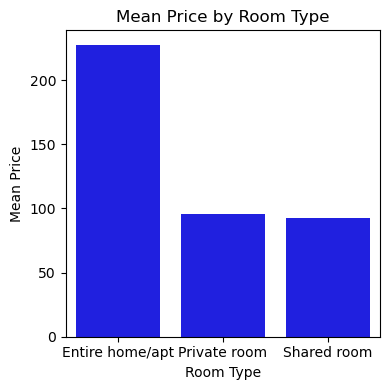

In [74]:
# Bar chart to show the relationship between room type and the price 

# Calculate mean prices for room type and property type
mean_price_by_room_type = df.groupby('room_type')['price'].mean().reset_index()
mean_price_by_property_type = df.groupby('property_type')['price'].mean().reset_index()

# Create a figure with two subplots
fig, ax = plt.subplots(1, 1, figsize=(4, 4))


# Bar chart for mean price by room type
sns.barplot(x='room_type', y='price', data=mean_price_by_room_type, color='blue')
ax.set_title('Mean Price by Room Type')
ax.set_xlabel('Room Type')
ax.set_ylabel('Mean Price')

plt.tight_layout()
plt.show()


The selected variables for these visualizations are crucial in understanding pricing on Airbnb. The "Mean Price by Room Type" plot shows that entire homes/apartments command higher prices than private or shared rooms, likely due to greater privacy and space. Notably, the pricing difference between private and shared rooms is minimal, suggesting that the valuation of privacy, in this context, transcends mere spatial considerations. Instead, it points towards a nuanced understanding of privacy, emphasizing the exclusivity of certain amenities, such as bathrooms. In cases of both private and shared rooms, the commonality of shared bathrooms underlines that the premium on privacy may not be placed on sleeping quarters but rather on the accommodation at large. This observation underscores a refined differentiation in the perception of privacy, which is pivotal in shaping pricing strategies on the Airbnb platform.


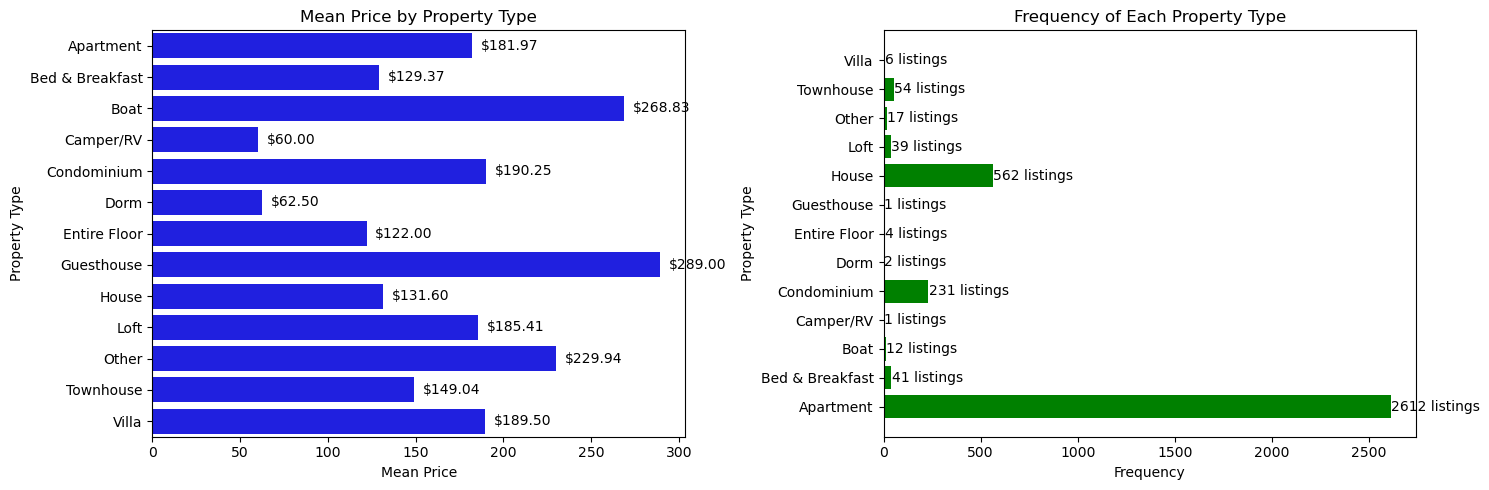

In [72]:

# Calculate mean prices for property type
mean_price_by_property_type = df.groupby('property_type')['price'].mean().reset_index()

# Calculate frequency of each property type
property_type_freq = df['property_type'].value_counts().reset_index()
property_type_freq.columns = ['property_type', 'frequency']

# Merge mean price with frequency for annotations
merged_data = pd.merge(mean_price_by_property_type, property_type_freq, on='property_type')


# Create a figure with two subplots
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# Bar chart for mean price by property type on the first subplot
sns.barplot(x='price', y='property_type', data=merged_data, ax=ax[0], color='blue')
ax[0].set_title('Mean Price by Property Type')
ax[0].set_xlabel('Mean Price')
ax[0].set_ylabel('Property Type')
# Annotating with mean price to the right of the bar
for index, row in merged_data.iterrows():
    ax[0].text(row['price'] + 5, index, f'${row["price"]:.2f}', va='center', ha='left', color='black')

# Histogram for the frequency of each property type on the second subplot
ax[1].barh(merged_data['property_type'], merged_data['frequency'], color='green')
ax[1].set_title('Frequency of Each Property Type')
ax[1].set_xlabel('Frequency')
ax[1].set_ylabel('Property Type')
# Annotating with frequency to the right of the bar
for index, row in merged_data.iterrows():
    ax[1].text(row['frequency'] + 1, index, f'{row["frequency"]} listings', va='center', ha='left', color='black')

plt.tight_layout()
plt.show()


Similarly, the "Mean Price by Property Type" reveals substantial price variation across property types, with some such as villas and houses typically listed at higher prices, suggesting that guests are willing to pay a premium for specific property features.

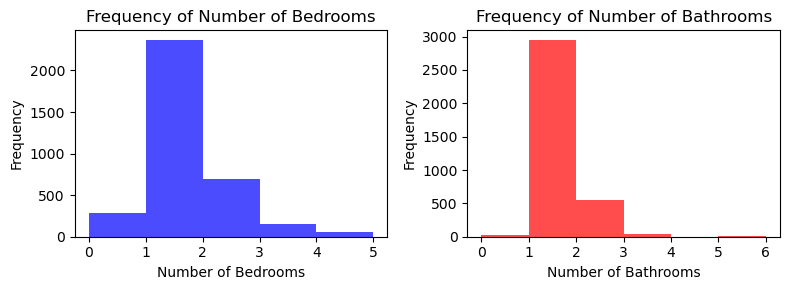

In [13]:
# histogram to show the relationship between price and the number of bedrooms/bathrooms

# Create a figure with two subplots for histograms
fig, ax = plt.subplots(1, 2, figsize=(8, 3))

# Histogram for the frequency of number of bedrooms
ax[0].hist(data_cleaned['bedrooms'], bins=range(int(data_cleaned['bedrooms'].max()) + 1), color='blue', alpha=0.7)
ax[0].set_title('Frequency of Number of Bedrooms')
ax[0].set_xlabel('Number of Bedrooms')
ax[0].set_ylabel('Frequency')
ax[0].set_xticks(range(int(data_cleaned['bedrooms'].max()) + 1))

# Histogram for the frequency of number of bathrooms
ax[1].hist(data_cleaned['bathrooms'], bins=range(int(data_cleaned['bathrooms'].max()) + 1), color='red', alpha=0.7)
ax[1].set_title('Frequency of Number of Bathrooms')
ax[1].set_xlabel('Number of Bathrooms')
ax[1].set_ylabel('Frequency')
ax[1].set_xticks(range(int(data_cleaned['bathrooms'].max()) + 1))

plt.tight_layout()
plt.show()

The histograms for the number of bedrooms and bathrooms show that most listings have 1 bedroom and 1 bathroom, which is reflective of the accommodation types that are most commonly available and hence, most commonly priced.

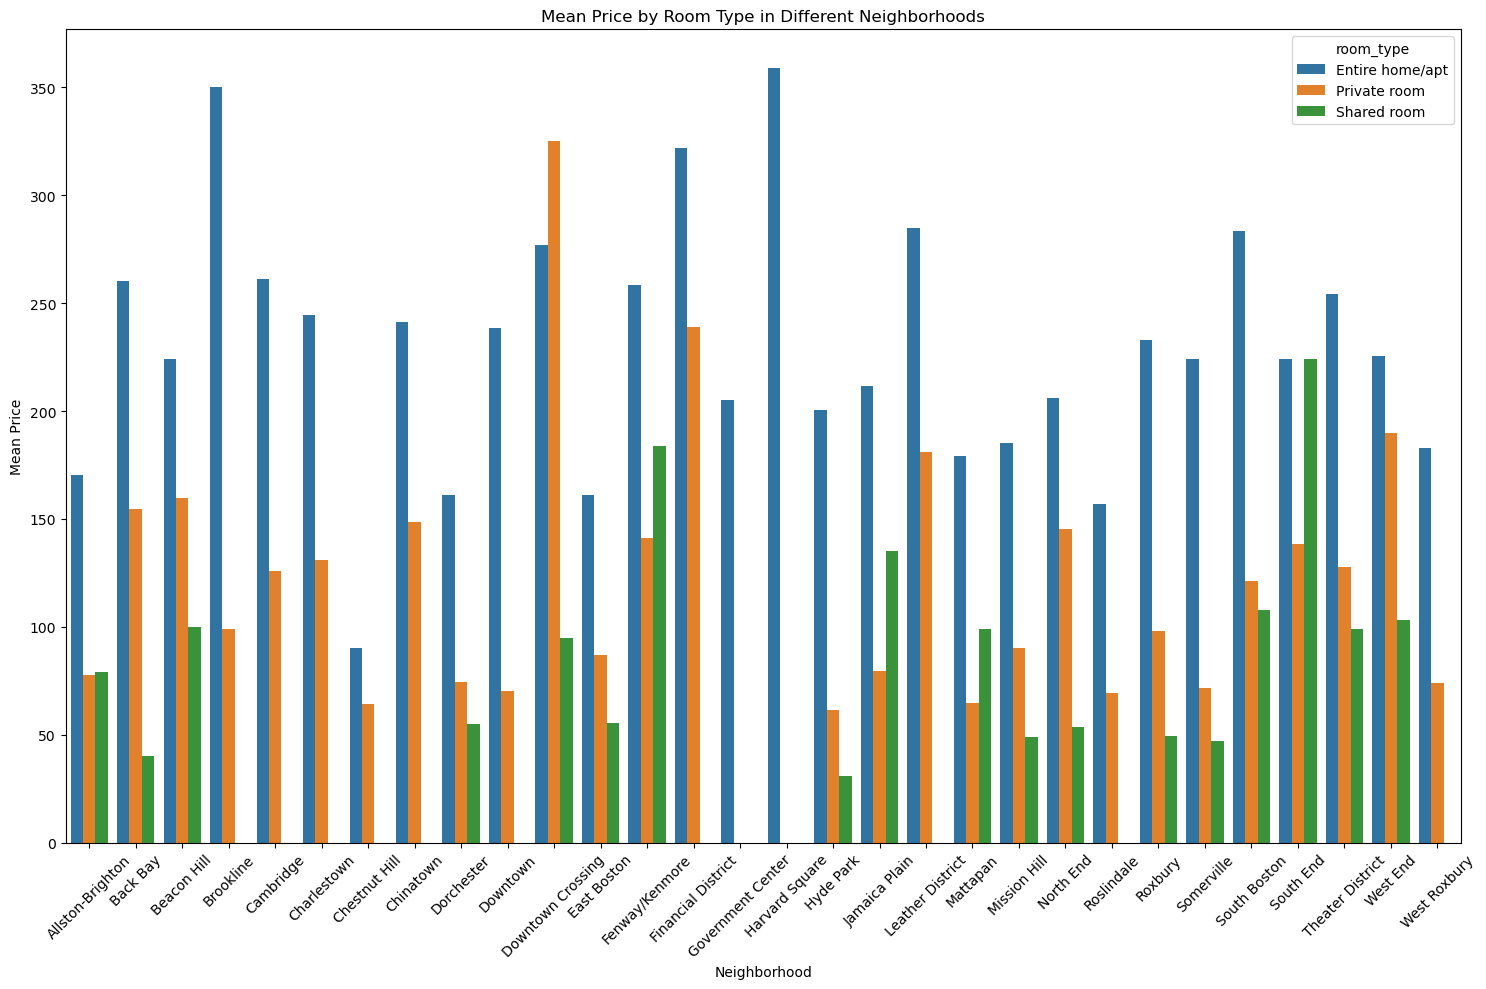

In [14]:
# bar chart using grouping method 

# adding one more x variable to better explain the covariate and such
x = df[['property_type', 'room_type', 'bathrooms', 'bedrooms', 'neighbourhood']]
# Grouping data by neighborhood and property type and calculating the mean price
grouped_data = df.groupby(['neighbourhood', 'room_type'])['price'].mean().reset_index()

# Creating a bar plot with seaborn
plt.figure(figsize=(15, 10))
sns.barplot(x='neighbourhood', y='price', hue='room_type', data=grouped_data)

# Adding plot title and labels
plt.title('Mean Price by Room Type in Different Neighborhoods')
plt.xlabel('Neighborhood')
plt.ylabel('Mean Price')
plt.xticks(rotation=45)  # Rotates the x labels to make them readable

# Display the plot
plt.tight_layout()
plt.show()


The visualization above illustrates the mean price for different types of rooms across various neighborhoods in Boston. This graph is directly related to the research question that investigates the correlation between room types and pricing while considering the location variable. The clear pattern that emerges is that entire homes/apartments typically fetch higher prices across all neighborhoods, followed by private rooms, and then shared rooms. This suggests that guests place a premium on privacy and space, which is consistently valued across different areas of the city. The disparities in pricing between neighborhoods also highlight the influence of location on the perceived value of Airbnb listings.

These visualizations all together directly tie to the research question by illustrating the relationship between property characteristics and listing prices. The observed patterns suggest a clear correlation: more private and spacious properties tend to be listed at higher prices. This reinforces the hypothesis that property type and the number of bedrooms and bathrooms can significantly influence the price. Understanding these patterns is essential for hosts to price their listings competitively and for guests to make informed choices based on their preferences and budget.

# Project 2

## The message

## Mapping

In [15]:
# installing necessary packages
!pip install q qeds fiona geopandas gensim folium pyLDAvis descartes

import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import folium

from shapely.geometry import Point

%matplotlib inline
# activate plot theme
#import qeds
#qeds.themes.mpl_style();

In [16]:
zipcode = df['zipcode']
latitude = df['latitude']
longitude = df['longitude']
df_map = pd.DataFrame({
    'zipcode': df['zipcode'],
    'latitude': df['latitude'],
    'longitude': df['longitude']
})
df_map.head()

,zipcode,latitude,longitude
0,02131,42.282619,-71.133068
1,02131,42.286241,-71.134374
2,02131,42.292438,-71.135765
3,NaN,42.281106,-71.121021
4,02131,42.284512,-71.136258


In [17]:
df_map["Coordinates"] = list(zip(df.longitude, df.latitude))
df_map.head()

,zipcode,latitude,longitude,Coordinates
0,02131,42.282619,-71.133068,"(-71.13306792912681, 42.28261879577949)"
1,02131,42.286241,-71.134374,"(-71.13437396457161, 42.286240821867416)"
2,02131,42.292438,-71.135765,"(-71.13576525374667, 42.2924378866568)"
3,NaN,42.281106,-71.121021,"(-71.12102117350553, 42.28110618827366)"
4,02131,42.284512,-71.136258,"(-71.1362580468337, 42.28451220982457)"


In [18]:
df_map["Coordinates"] = df_map["Coordinates"].apply(Point)
df_map.head()

,zipcode,latitude,longitude,Coordinates
0,02131,42.282619,-71.133068,POINT (-71.13306792912681 42.28261879577949)
1,02131,42.286241,-71.134374,POINT (-71.13437396457161 42.286240821867416)
2,02131,42.292438,-71.135765,POINT (-71.13576525374667 42.2924378866568)
3,NaN,42.281106,-71.121021,POINT (-71.12102117350553 42.28110618827366)
4,02131,42.284512,-71.136258,POINT (-71.1362580468337 42.28451220982457)


In [19]:
gdf = gpd.GeoDataFrame(df_map, geometry="Coordinates")
gdf.head()

,zipcode,latitude,longitude,Coordinates
0,02131,42.282619,-71.133068,POINT (-71.13307 42.28262)
1,02131,42.286241,-71.134374,POINT (-71.13437 42.28624)
2,02131,42.292438,-71.135765,POINT (-71.13577 42.29244)
3,NaN,42.281106,-71.121021,POINT (-71.12102 42.28111)
4,02131,42.284512,-71.136258,POINT (-71.13626 42.28451)


In [20]:
print('\nThe geometry column is:', gdf.geometry.name)


The geometry column is: Coordinates


In [21]:
state_df = gpd.read_file("http://www2.census.gov/geo/tiger/GENZ2016/shp/cb_2016_us_state_5m.zip")
state_df.head()

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry
0,01,01779775,0400000US01,01,AL,Alabama,00,131173688951,4593686489,"MULTIPOLYGON (((-88.04374 30.51742, -88.03661 ..."
1,02,01785533,0400000US02,02,AK,Alaska,00,1477946266785,245390495931,"MULTIPOLYGON (((-133.65582 55.62562, -133.6249..."
2,04,01779777,0400000US04,04,AZ,Arizona,00,294198560125,1027346486,"POLYGON ((-114.79968 32.59362, -114.80939 32.6..."
3,08,01779779,0400000US08,08,CO,Colorado,00,268429343790,1175112870,"POLYGON ((-109.06025 38.59933, -109.05954 38.7..."
4,09,01779780,0400000US09,09,CT,Connecticut,00,12542638347,1815476291,"POLYGON ((-73.72777 41.10070, -73.69595 41.115..."


In [22]:
print(state_df.columns)
unique_values = state_df['NAME'].unique()
print(unique_values)


Index(['STATEFP', 'STATENS', 'AFFGEOID', 'GEOID', 'STUSPS', 'NAME', 'LSAD',
       'ALAND', 'AWATER', 'geometry'],
      dtype='object')
['Alabama' 'Alaska' 'Arizona' 'Colorado' 'Connecticut' 'Florida' 'Georgia'
 'Idaho' 'Indiana' 'Kansas' 'Louisiana' 'Massachusetts' 'Minnesota'
 'Missouri' 'Montana' 'Nevada' 'New Jersey' 'New York' 'North Dakota'
 'Oklahoma' 'Pennsylvania' 'South Carolina' 'South Dakota' 'Texas'
 'Vermont' 'West Virginia' 'Puerto Rico' 'Arkansas' 'California'
 'Delaware' 'District of Columbia' 'Hawaii' 'Illinois' 'Iowa' 'Kentucky'
 'Maine' 'Maryland' 'Michigan' 'Mississippi' 'Nebraska' 'New Hampshire'
 'New Mexico' 'North Carolina' 'Ohio' 'Oregon' 'Rhode Island' 'Tennessee'
 'Utah' 'Virginia' 'Washington' 'Wisconsin' 'American Samoa' 'Guam'
 'Commonwealth of the Northern Mariana Islands'
 'United States Virgin Islands' 'Wyoming']


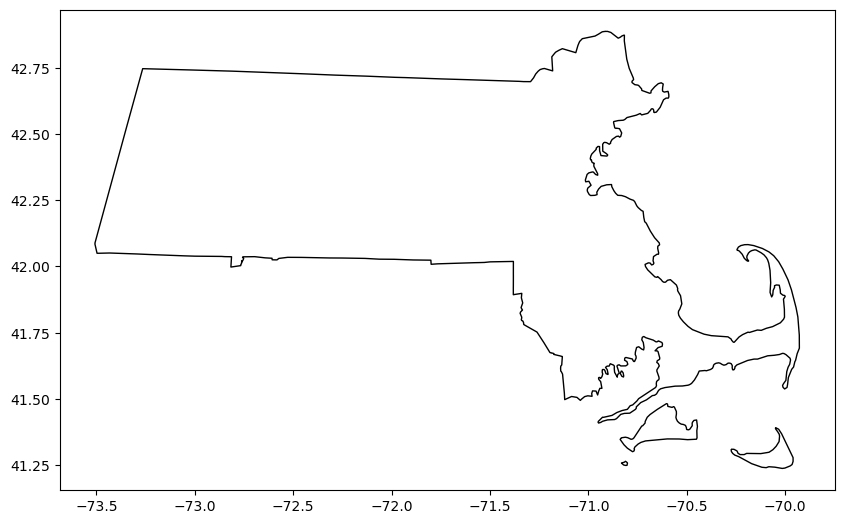

In [23]:
fig, gax = plt.subplots(figsize=(10, 10))
state_df.query("NAME == 'Massachusetts'").plot(ax=gax, edgecolor="black", color="white")
plt.show()

In [24]:
county_df = gpd.read_file("http://www2.census.gov/geo/tiger/GENZ2016/shp/cb_2016_us_county_5m.zip")
county_df.head()

,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry
0,04,015,00025445,0500000US04015,04015,Mohave,06,34475567011,387344307,"POLYGON ((-114.75562 36.08717, -114.75364 36.0..."
1,12,035,00308547,0500000US12035,12035,Flagler,06,1257365642,221047161,"POLYGON ((-81.52366 29.62243, -81.32406 29.625..."
2,20,129,00485135,0500000US20129,20129,Morton,06,1889993251,507796,"POLYGON ((-102.04195 37.02474, -102.04195 37.0..."
3,28,093,00695770,0500000US28093,28093,Marshall,06,1828989833,9195190,"POLYGON ((-89.72432 34.99521, -89.64428 34.995..."
4,29,510,00767557,0500000US29510,29510,St. Louis,25,160458044,10670040,"POLYGON ((-90.31821 38.60002, -90.30183 38.655..."


In [25]:
county_df = county_df.query("STATEFP == '25'") 
county_df

,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry
1225,25,023,00606938,0500000US25023,25023,Plymouth,06,1706313612,1125287797,"POLYGON ((-71.08048 42.09554, -70.94896 42.148..."
1281,25,025,00606939,0500000US25025,25025,Suffolk,06,150865086,160470296,"POLYGON ((-71.19115 42.28306, -71.17864 42.294..."
1685,25,005,00606929,0500000US25005,25005,Bristol,06,1432482514,357547961,"MULTIPOLYGON (((-70.83204 41.60650, -70.82373 ..."
1686,25,009,00606931,0500000US25009,25009,Essex,06,1275359633,870400284,"POLYGON ((-71.23810 42.66949, -71.25520 42.736..."
1715,25,013,00606933,0500000US25013,25013,Hampden,06,1598136446,44413460,"POLYGON ((-73.07278 42.11153, -73.06118 42.119..."
1800,25,021,00606937,0500000US25021,25021,Norfolk,06,1025875907,124960223,"MULTIPOLYGON (((-70.84461 42.26051, -70.82466 ..."
1833,25,019,00606936,0500000US25019,25019,Nantucket,06,119431671,667032059,"POLYGON ((-70.27553 41.31046, -70.26063 41.310..."
1896,25,003,00606928,0500000US25003,25003,Berkshire,06,2400678867,50642922,"POLYGON ((-73.50814 42.08626, -73.35253 42.510..."
2026,25,027,00606940,0500000US25027,25027,Worcester,06,3912530796,177502550,"POLYGON ((-72.31599 42.39454, -72.30628 42.420..."
2213,25,011,00606932,0500000US25011,25011,Franklin,06,1810952650,65556538,"POLYGON ((-73.02301 42.74114, -73.02290 42.741..."


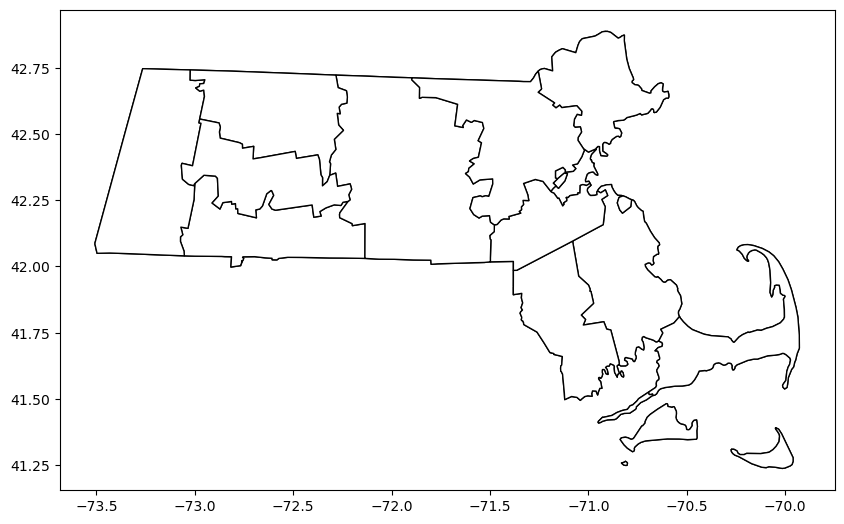

In [26]:
fig, gax = plt.subplots(figsize=(10, 10))

state_df.query("NAME == 'Massachusetts'").plot(ax=gax, edgecolor="black", color="white")
county_df.plot(ax=gax, edgecolor="black", color="white")

plt.show()

In [27]:
## map boston

place_df = gpd.read_file("https://www2.census.gov/geo/tiger/TIGER2019/PLACE/tl_2019_01_place.zip")
place_df.head()

,STATEFP,PLACEFP,PLACENS,GEOID,NAME,NAMELSAD,LSAD,CLASSFP,PCICBSA,PCINECTA,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,01,05932,02405250,0105932,Berry,Berry town,43,C1,N,N,G4110,A,27884733,15029,+33.6667018,-087.6093110,"POLYGON ((-87.63910 33.66662, -87.63794 33.666..."
1,01,25840,02403599,0125840,Fayette,Fayette city,25,C1,N,N,G4110,A,22143483,212108,+33.6942153,-087.8311690,"POLYGON ((-87.85507 33.70779, -87.85510 33.710..."
2,01,32536,02406632,0132536,Gu-Win,Gu-Win town,43,C1,N,N,G4110,A,5031111,0,+33.9443303,-087.8703764,"POLYGON ((-87.88578 33.95916, -87.88577 33.959..."
3,01,02908,02403122,0102908,Ashville,Ashville city,25,C1,N,N,G4110,A,49762931,487106,+33.8351967,-086.2700148,"POLYGON ((-86.30442 33.87221, -86.30355 33.872..."
4,01,46696,02406094,0146696,Margaret,Margaret town,43,C1,N,N,G4110,A,25438710,39224,+33.6728398,-086.4639420,"MULTIPOLYGON (((-86.46153 33.69044, -86.46100 ..."


## Conclusion


The findings from the project underscore a significant correlation between property attributes and their pricing on Airbnb in Boston. The data indicates that entire homes or apartments generally command higher prices, reinforcing the notion that space and privacy are highly valued in the short-term rental market. The variability in pricing across neighborhoods suggests that location is a crucial determinant of pricing, potentially influenced by factors such as proximity to city attractions, neighborhood safety, and local amenities.


These observations align with economic theories on goods differentiation and consumer preference, highlighting that consumers are willing to pay premium prices for goods that better satisfy their preferences—in this case, accommodation that offers more space and privacy. The study's implication for hosts on Airbnb is clear: understanding these preferences can lead to more strategic pricing and better market positioning. Future research could expand on this by exploring the impact of additional factors such as seasonal trends, special events, and the effect of reviews on pricing